In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import time 
import seaborn as sns 
from matplotlib.ticker import PercentFormatter
import calendar
import matplotlib.ticker as ticker
from PIL import * 
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
from matplotlib.patches import Polygon
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf 
from scipy.io import netcdf
from netCDF4 import Dataset
from wrf import (getvar, interplevel, to_np, latlon_coords)
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import interp2d
import matplotlib.cm as cm
from sympy.physics.vector import curl, ReferenceFrame
import metpy.calc as mc
from metpy.units import units
import math as mt

In [2]:
parma = Dataset("maysak2015_rw.nc") #open netcdf file

In [3]:
lons = parma.variables["XLONG"][:]
lon = lons[1, :,:]
lats = parma.variables["XLAT"][:]
lat = lats[1, :,:]
pb = parma.variables["PB"][:]
p = parma.variables["P"][:]
u =  units("m/s")*parma.variables["U"][:]
u = u[:,:,:, :254]
v = units("m/s")*parma.variables["V"][:]
v = v[:,:,:194, :]
wind = np.sqrt((u)**2 + (v)**2)*(1.94384)
w = parma.variables["W"][:]*(1.94384)
q = parma.variables["QVAPOR"][:]
th = parma.variables["T"][:] + 300

pres = (p + pb)/100
temp = th*(pres/1000)**(0.2857)
temp1 = th*np.power((pres/1000), 0.2857)
es = 6.122*np.exp((17.67*(temp-273.15))/(temp-29.66))
ws = (0.622*es)/(pres-es)    # saturation mixing ratio
te = th * np.exp((2.54*(10**6)*ws)/(1004.67*temp))  # equivalent potential temperature
#te = te + 273.15

<ipython-input-3-9893c35ce830>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lons = parma.variables["XLONG"][:]
<ipython-input-3-9893c35ce830>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lats = parma.variables["XLAT"][:]
<ipython-input-3-9893c35ce830>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence 

In [4]:
f = mc.coriolis_parameter(np.deg2rad(lat)).to(units("1/sec"))
dx, dy = mc.lat_lon_grid_deltas(lon, lat)
dx = dx[None, :]
dy = dy[None, :]

In [5]:
date = [10, 14, 18, 22, 26, 30, 6]
latx = [87, 96, 108,118, 126, 132, 79 ]
lonx = [191, 171,155,135,112, 88, 215 ]

In [6]:
u1 = u[date[0], :, :]
v1 = v[date[0], :, :]
avort1 = mc.vorticity(u1,v1, dx=dx, dy=dy) + f
avortt1 = avort1[:, latx[0], :]

lon1 = lons[date[0], latx[0], :]
lat1 = lons[date[0], :, lonx[0]]
print(lon1.shape)

pres1 = pres[date[0],:,latx[0],lonx[0] ]
#pres1 = pres1/100
print(pres1.shape)

lonss1, press1 = np.meshgrid(lon1, pres1)
latss1, presx1 = np.meshgrid(lat1, pres1)
w1 = w[date[0], 0:32, latx[0], : ]
wind1 = wind[date[0], 0:32, latx[0], : ]
U1 = u1[:, latx[0], :]
V1 = v1[:, latx[0], :]
te1 = te[date[0], :, latx[0], : ]
tex1 = te[date[0], :, :, lonx[0]]
print(w1.shape)
print(te1.shape)

(254,)
(32,)
(32, 254)
(32, 254)


In [7]:
u1.shape

(32, 194, 254)

In [8]:
u2 = u[date[1], :, :]
v2 = v[date[1], :, :]
avort2 = mc.vorticity(u2,v2, dx=dx, dy=dy) + f
avortt2 = avort2[:, latx[1], :]

lon2 = lons[date[1], latx[1], :]
lat2 = lons[date[1], :, lonx[1]]
print(lon2.shape)

pres2 = pres[date[1],:,latx[1],lonx[1] ]
#pres2 = pres2/100
print(pres2.shape)

lonss2, press2 = np.meshgrid(lon2, pres2)
latss2, presx2 = np.meshgrid(lat2, pres2)
w2 = w[date[1], 0:32, latx[1], : ]
wind2 = wind[date[1], 0:32, latx[1], : ]
U2 = u2[:, latx[1], :]
V2 = v2[:, latx[1], :]
te2 = te[date[1],:, latx[1], : ]
tex2 = te[date[1], :, :, lonx[1]]
print(w2.shape)
print(te2.shape)

(254,)
(32,)
(32, 254)
(32, 254)


In [9]:
u3 = u[date[2], :, :]
v3 = v[date[2], :, :]
avort3 = mc.vorticity(u3,v3, dx=dx, dy=dy) + f
avortt3 = avort3[:, latx[2], :]

lon3 = lons[date[2], latx[2], :]
lat3 = lons[date[2], :, lonx[2]]
print(lon3.shape)

pres3 = pres[date[2],:,latx[2],lonx[2] ]
#pres3 = pres3/100
print(pres3.shape)

lonss3, press3 = np.meshgrid(lon3, pres3)
latss3, presx3 = np.meshgrid(lat3, pres3)
w3 = w[date[2], 0:32, latx[2], : ]
wind3 = wind[date[2], 0:32, latx[2], : ]
U3 = u3[:, latx[2], :]
V3 = v3[:, latx[2], :]
te3 = te[date[2],:, latx[2], : ]
tex3 = te[date[2], :, :, lonx[2]]
print(w3.shape)
print(te3.shape)

u4 = u[date[3], :, :]
v4 = v[date[3], :, :]
avort4 = mc.vorticity(u4,v4, dx=dx, dy=dy) + f
avortt4 = avort4[:, latx[3], :]

lon4 = lons[date[3], latx[3], :]
lat4 = lons[date[3], :, lonx[3]]
print(lon4.shape)

pres4 = pres[date[3],:,latx[3],lonx[3] ]
#pres4 = pres4/100
print(pres4.shape)

lonss4, press4 = np.meshgrid(lon4, pres4)
latss4, presx4 = np.meshgrid(lat4, pres4)
w4 = w[date[3], 0:32, latx[3], : ]
wind4 = wind[date[3], 0:32, latx[3], : ]
U4 = u4[:, latx[3], :]
V4 = v4[:, latx[3], :]
te4 = te[date[3],:, latx[3], : ]
tex4 = te[date[3], :, :, lonx[3]]
print(w4.shape)
print(te4.shape)

(254,)
(32,)
(32, 254)
(32, 254)
(254,)
(32,)
(32, 254)
(32, 254)


In [10]:
u5 = u[date[4], :, :]
v5 = v[date[4], :, :]
avort5 = mc.vorticity(u5,v5, dx=dx, dy=dy) + f
avortt5 = avort5[:, latx[4], :]

lon5 = lons[date[4], latx[4], :]
lat5 = lons[date[4], :, lonx[4]]
print(lon3.shape)

pres5 = pres[date[4],:,latx[4],lonx[4] ]
#pres3 = pres3/100
print(pres5.shape)

lonss5, press5 = np.meshgrid(lon5, pres5)
latss5, presx5 = np.meshgrid(lat5, pres5)
w5 = w[date[4], 0:32, latx[4], : ]
wind5 = wind[date[4], 0:32, latx[4], : ]
U5 = u5[:, latx[4], :]
V5 = v5[:, latx[4], :]
te5 = te[date[4],:, latx[4], : ]
tex5 = te[date[4], :, :, lonx[4]]
print(w5.shape)
print(te5.shape)

u6 = u[date[5], :, :]
v6 = v[date[5], :, :]
avort6 = mc.vorticity(u6,v6, dx=dx, dy=dy) + f
avortt6 = avort6[:, latx[5], :]

lon6 = lons[date[5], latx[5], :]
lat6 = lons[date[5], :, lonx[5]]
print(lon6.shape)

pres6 = pres[date[5],:,latx[5],lonx[5] ]
#pres4 = pres4/100
print(pres6.shape)

lonss6, press6 = np.meshgrid(lon6, pres6)
latss6, presx6 = np.meshgrid(lat6, pres6)
w6 = w[date[5], 0:32, latx[5], : ]
wind6 = wind[date[5], 0:32, latx[5], : ]
U6 = u6[:, latx[5], :]
V6 = v6[:, latx[5], :]
te6 = te[date[5],:, latx[5], : ]
tex6 = te[date[5], :, :, lonx[5]]
print(w6.shape)
print(te6.shape)

(254,)
(32,)
(32, 254)
(32, 254)
(254,)
(32,)
(32, 254)
(32, 254)


In [11]:
u7 = u[date[6], :, :]
v7 = v[date[6], :, :]
avort7 = mc.vorticity(u7,v7, dx=dx, dy=dy) + f
avortt7 = avort7[:, latx[6], :]

lon7 = lons[date[6], latx[6], :]
lat7 = lons[date[6], :, lonx[6]]
print(lon7.shape)

pres7 = pres[date[6],:,latx[6],lonx[6] ]
#pres1 = pres1/100
print(pres1.shape)

lonss7, press7 = np.meshgrid(lon7, pres7)
latss7, presx7 = np.meshgrid(lat7, pres7)
w7 = w[date[6], 0:32, latx[6], : ]
wind7 = wind[date[6], 0:32, latx[6], : ]
U7 = u7[:, latx[6], :]
V7 = v7[:, latx[6], :]
te7 = te[date[6], :, latx[6], : ]
tex7 = te[date[6], :, :, lonx[6]]
print(w1.shape)
print(te1.shape)

(254,)
(32,)
(32, 254)
(32, 254)


In [ ]:
def fmt(x, pos):
    a, b = '{:1.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [15]:
c_lon = [136.5, 134.6, 133.2, 131.3, 129.2, 127.009, 138.679]
c_lon = np.deg2rad(c_lon)
c_lat = [10.9, 11.7, 12.8, 13.7, 14.4, 15, 10.2]
c_lat = np.deg2rad(c_lat)

In [16]:
lons1_m = lonss1[:, 164:191]
lons1_p = lonss1[:, 191:220]

w1= w1[:, 164:220]
U1= U1[:, 164:220]
V1= V1[:, 164:220]
avortt1 = avortt1[:, 164:220]
press1 = press1[:,164:220]

a1_m = (np.cos(c_lat[0])*np.cos(c_lat[0]))*(np.sin((np.deg2rad(lons1_m)-c_lon[0])/2)**2)
c1_m = 2*np.arctan2(np.sqrt(a1_m), np.sqrt(1-a1_m))
dist1_m = -6373*c1_m

a1_p = (np.cos(c_lat[0])*np.cos(c_lat[0]))*(np.sin((np.deg2rad(lons1_p)-c_lon[0])/2)**2)
c1_p = 2*np.arctan2(np.sqrt(a1_p), np.sqrt(1-a1_p))
dist1_p = 6373*c1_p

dist1 = np.concatenate((dist1_m, dist1_p), axis = 1)

In [17]:
lons2_m = lonss2[:, 143:170]
lons2_p = lonss2[:, 170:199]

w2= w2[:, 143:199]
U2= U2[:, 143:199]
V2= V2[:, 143:199]
avortt2 = avortt2[:,143:199]
press2 = press2[:,143:199]

a2_m = (np.cos(c_lat[1])*np.cos(c_lat[1]))*(np.sin((np.deg2rad(lons2_m)-c_lon[1])/2)**2)
c2_m = 2*np.arctan2(np.sqrt(a2_m), np.sqrt(1-a2_m))
dist2_m = -6373*c2_m

a2_p = (np.cos(c_lat[1])*np.cos(c_lat[1]))*(np.sin((np.deg2rad(lons2_p)-c_lon[1])/2)**2)
c2_p = 2*np.arctan2(np.sqrt(a2_p), np.sqrt(1-a2_p))
dist2_p = 6373*c2_p

dist2 = np.concatenate((dist2_m, dist2_p), axis = 1)

In [18]:
lons3_m = lonss3[:, 128:155]
lons3_p = lonss3[:, 155:184]

w3= w3[:,  128:184]
U3= U3[:,  128:184]
V3= V3[:,  128:184]
avortt3 = avortt3[:, 128:184]
press3 = press3[:, 128:184]

a3_m = (np.cos(c_lat[2])*np.cos(c_lat[2]))*(np.sin((np.deg2rad(lons3_m)-c_lon[2])/2)**2)
c3_m = 2*np.arctan2(np.sqrt(a3_m), np.sqrt(1-a3_m))
dist3_m = -6373*c3_m

a3_p = (np.cos(c_lat[2])*np.cos(c_lat[2]))*(np.sin((np.deg2rad(lons3_p)-c_lon[2])/2)**2)
c3_p = 2*np.arctan2(np.sqrt(a3_p), np.sqrt(1-a3_p))
dist3_p = 6373*c3_p

dist3 = np.concatenate((dist3_m, dist3_p), axis = 1)

In [19]:
lons4_m = lonss4[:, 108:135]
lons4_p = lonss4[:, 135:164]

w4= w4[:,  108:164]
U4= U4[:,  108:164]
V4= V4[:,  108:164]
avortt4 = avortt4[:, 108:164]
press4 = press4[:,108:164]

a4_m = (np.cos(c_lat[3])*np.cos(c_lat[3]))*(np.sin((np.deg2rad(lons4_m)-c_lon[3])/2)**2)
c4_m = 2*np.arctan2(np.sqrt(a4_m), np.sqrt(1-a4_m))
dist4_m = -6373*c4_m

a4_p = (np.cos(c_lat[3])*np.cos(c_lat[3]))*(np.sin((np.deg2rad(lons4_p)-c_lon[3])/2)**2)
c4_p = 2*np.arctan2(np.sqrt(a4_p), np.sqrt(1-a4_p))
dist4_p = 6373*c4_p

dist4 = np.concatenate((dist4_m, dist4_p), axis = 1)

In [20]:
lons5_m = lonss5[:, 85:112]
lons5_p = lonss5[:, 112:141]

w5= w5[:,  85:141]
U5= U5[:,  85:141]
V5= V5[:,  85:141]
avortt5 = avortt5[:, 85:141]
press5 = press5[:,85:141]

a5_m = (np.cos(c_lat[4])*np.cos(c_lat[4]))*(np.sin((np.deg2rad(lons5_m)-c_lon[4])/2)**2)
c5_m = 2*np.arctan2(np.sqrt(a5_m), np.sqrt(1-a5_m))
dist5_m = -6373*c5_m

a5_p = (np.cos(c_lat[4])*np.cos(c_lat[4]))*(np.sin((np.deg2rad(lons5_p)-c_lon[4])/2)**2)
c5_p = 2*np.arctan2(np.sqrt(a5_p), np.sqrt(1-a5_p))
dist5_p = 6373*c5_p

dist5 = np.concatenate((dist5_m, dist5_p), axis = 1)

In [21]:
lons6_m = lonss6[:, 61:88]
lons6_p = lonss6[:, 88:117]

w6= w6[:,61:117]
U6= U6[:,61:117]
V6= V6[:,61:117]
avortt6 = avortt6[:, 61:117]
press6 = press6[:,61:117]

a6_m = (np.cos(c_lat[5])*np.cos(c_lat[5]))*(np.sin((np.deg2rad(lons6_m)-c_lon[5])/2)**2)
c6_m = 2*np.arctan2(np.sqrt(a6_m), np.sqrt(1-a6_m))
dist6_m = -6373*c6_m

a6_p = (np.cos(c_lat[5])*np.cos(c_lat[5]))*(np.sin((np.deg2rad(lons6_p)-c_lon[5])/2)**2)
c6_p = 2*np.arctan2(np.sqrt(a6_p), np.sqrt(1-a6_p))
dist6_p = 6373*c6_p

dist6 = np.concatenate((dist6_m, dist6_p), axis = 1)

In [22]:
lons7_m = lonss6[:, 188:215]
lons7_p = lonss6[:, 215:244]

w7= w7[:,188:244]
wind7 =wind7[:, 188:244]
U7= U7[:,188:244]
V7= V7[:,188:244]
te7 = te7[:,188:244]
avortt7 = avortt7[:, 188:244]
press7 = press7[:,188:244]

a7_m = (np.cos(c_lat[6])*np.cos(c_lat[6]))*(np.sin((np.deg2rad(lons7_m)-c_lon[6])/2)**2)
c7_m = 2*np.arctan2(np.sqrt(a7_m), np.sqrt(1-a7_m))
dist7_m = -6373*c7_m

a7_p = (np.cos(c_lat[6])*np.cos(c_lat[6]))*(np.sin((np.deg2rad(lons7_p)-c_lon[6])/2)**2)
c7_p = 2*np.arctan2(np.sqrt(a7_p), np.sqrt(1-a7_p))
dist7_p = 6373*c7_p

dist7 = np.concatenate((dist7_m, dist7_p), axis = 1)

<ipython-input-23-d99d8d7896f5>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(axes[0,0].get_xticklabels(), Fontsize = 25)
<ipython-input-23-d99d8d7896f5>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(axes[0,0].get_yticklabels(), Fontsize = 25)
<ipython-input-23-d99d8d7896f5>:31: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(axes[0,1].get_xticklabels(), Fontsize = 25)
<ipython-input-23-d99d8d7896f5>:32: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(axes[0,1].get_yticklabels(), Fontsize = 25)
<ipython-input-23-d99d8d7896f5>:51: MatplotlibDeprecationWarning: Case-insensitive properties were d

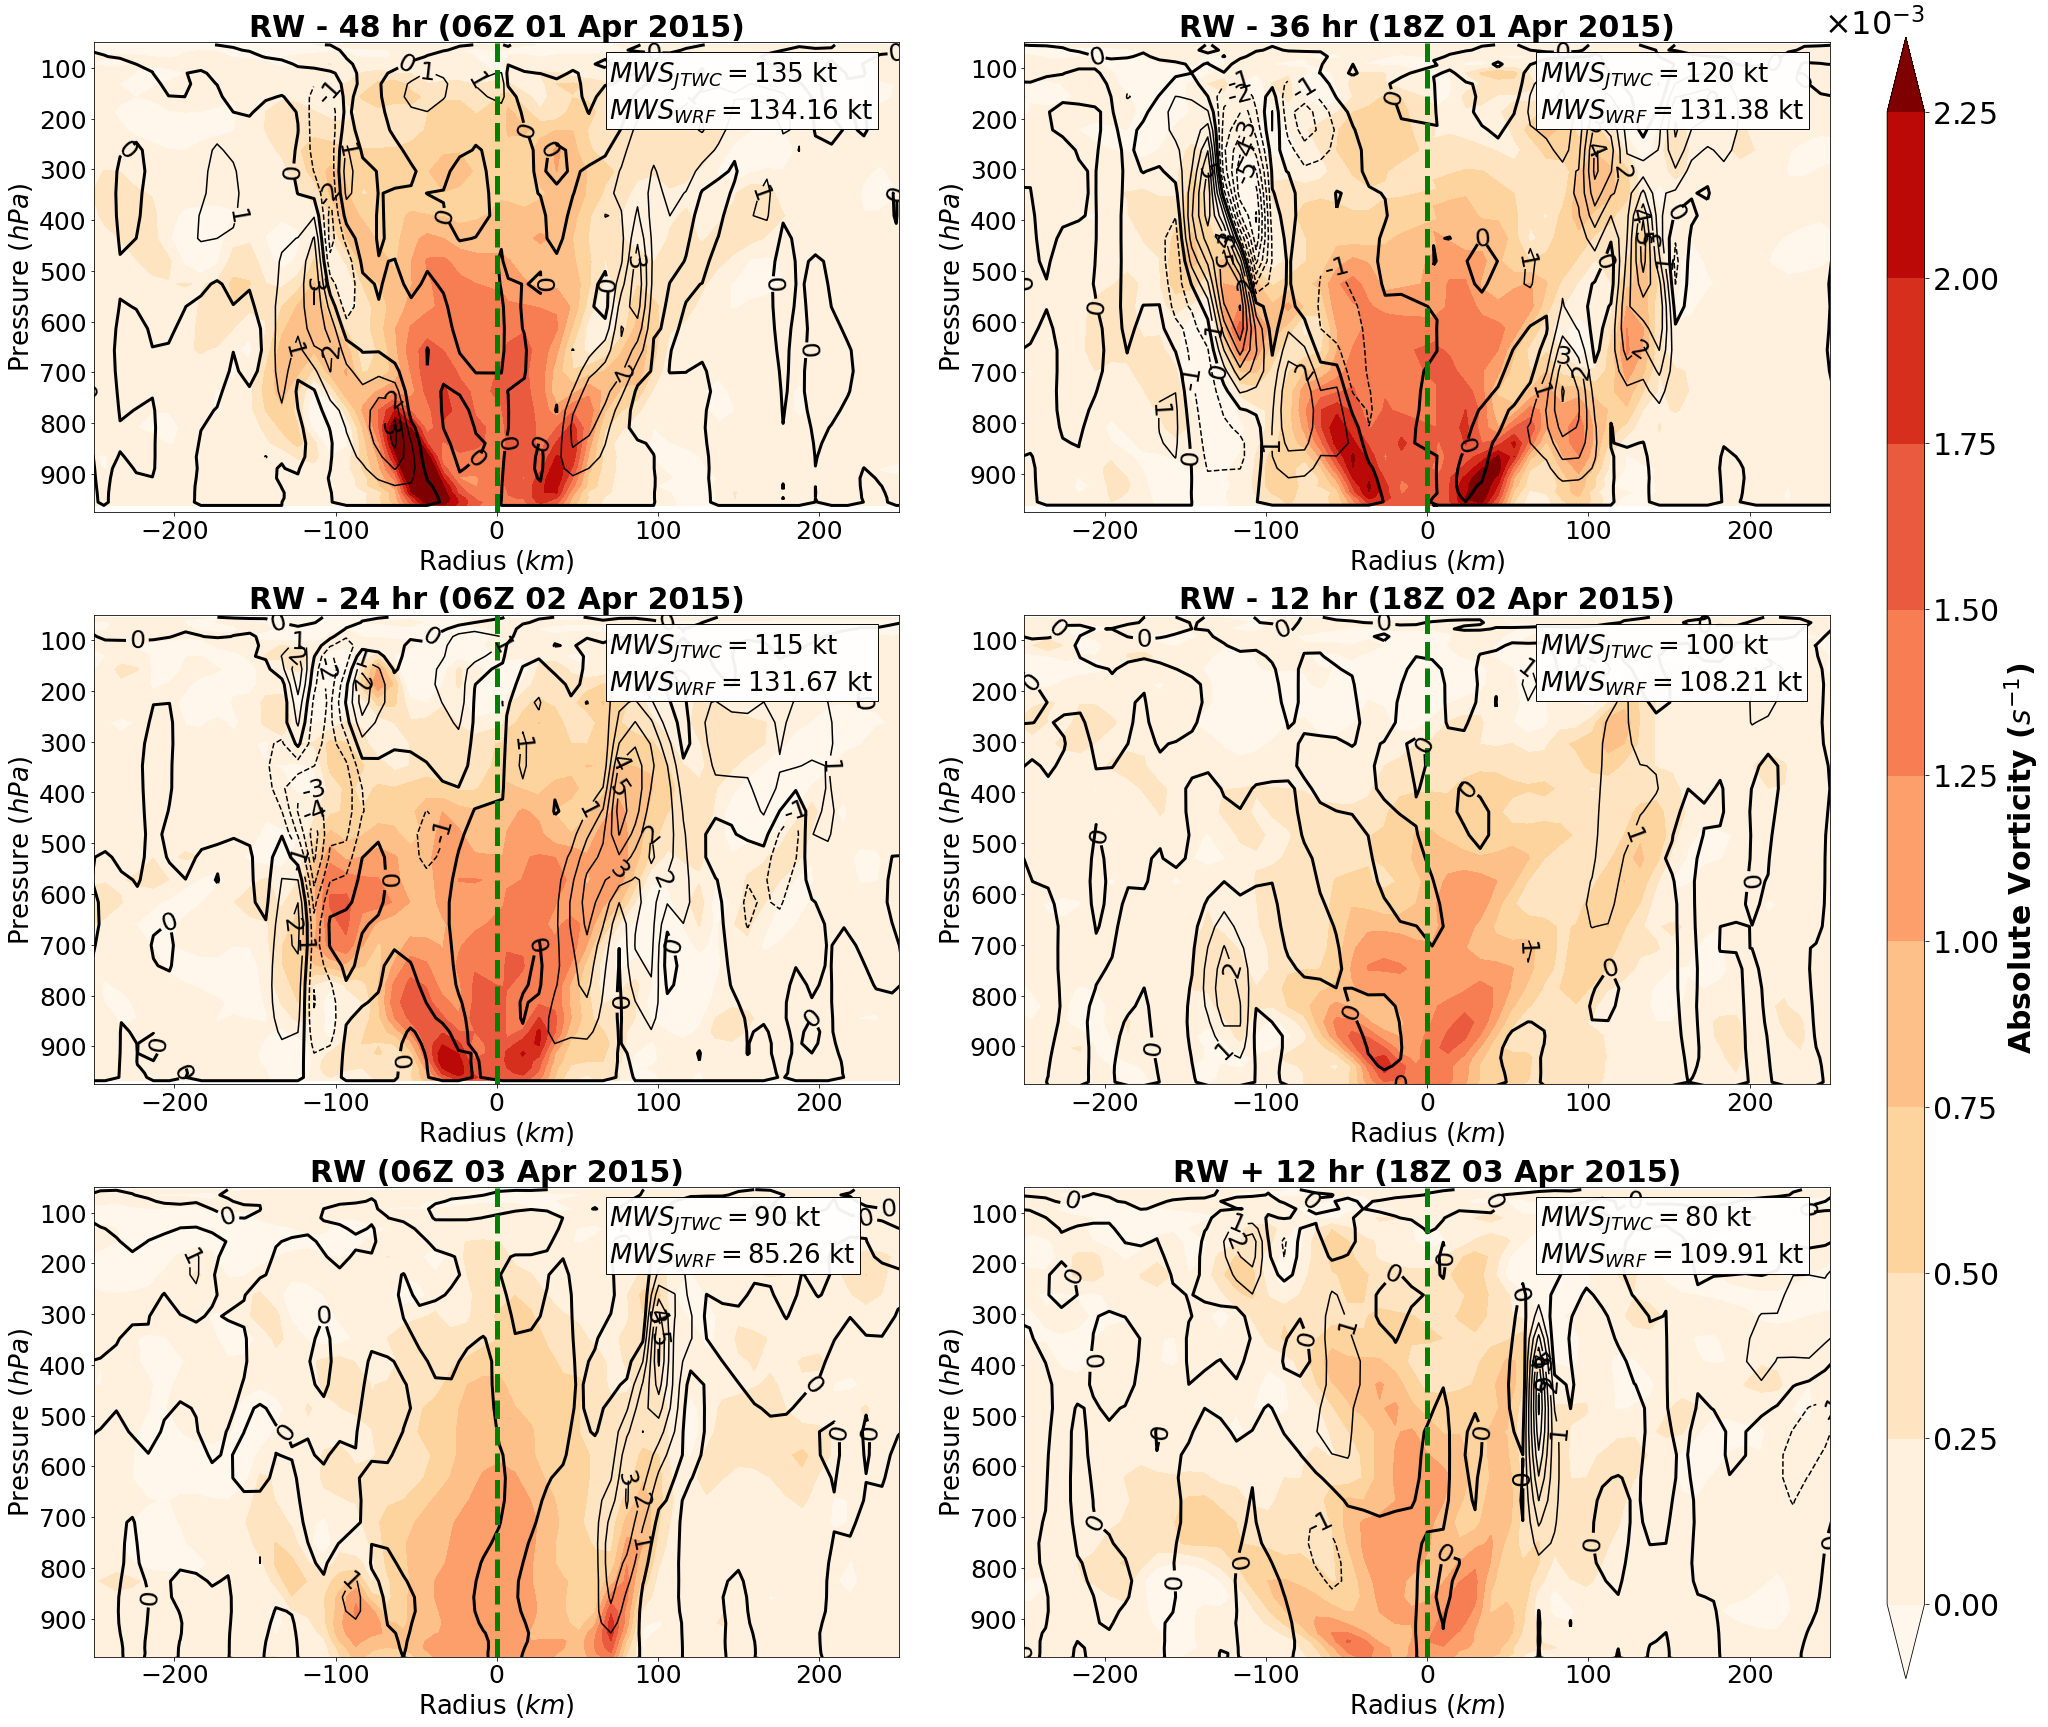

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (26,24))
#axes = (ax1, ax2, ax3, ax4)
cmap=cm.get_cmap('OrRd')

level1 = np.arange(0, 0.0025, 0.00025)
levels = np.arange(-6,10, 1)
axes[0, 0].set_title("RW - 48 hr (06Z 01 Apr 2015)", fontsize = 30,  fontweight = "bold")
c1 = axes[0,0].contour(dist1, press1, w1,levels, colors = "k")
cf = axes[0,0].contourf(dist1, press1, avortt1, level1, cmap = cmap, vmin = 0, vmax = 0.0025, extend = "both")
cl1 = plt.clabel(c1, levels[1::1], inline=1, inline_spacing = -1,  fmt='%1.0f', fontsize=25, rightside_up = True)
c1.collections[6].set_linewidth(3)
plt.setp(axes[0,0].get_xticklabels(), Fontsize = 25)
plt.setp(axes[0,0].get_yticklabels(), Fontsize = 25)
axes[0,0].set_xlabel("Radius ($km$)", fontsize =26)
axes[0,0].set_ylabel("Pressure ($hPa$)", fontsize =26)
axes[0,0].set_yticks(np.arange(0,1000,100))
axes[0,0].set_ylim([50,975])
axes[0,0].set_xlim([-250, 250])
axes[0,0].invert_yaxis()
axes[0,0].axvline(x=0, color = "g", linestyle = "--",  linewidth = 5)
tex1 = r"$MWS_{JTWC}= 135$ kt" "\n" r"$MWS_{WRF}= 134.16$ kt "
t1 = axes[0,0].text(70, 200, tex1, fontsize = 26, zorder = 199)
t1.set_bbox(dict(facecolor = "w", alpha = 0.95, edgecolor = "k"))


axes[0,1].set_title("RW - 36 hr (18Z 01 Apr 2015)", fontsize = 30,  fontweight = "bold")
c2 = axes[0,1].contour(dist2, press2, w2,  levels, colors = "k")
cf = axes[0,1].contourf(dist2, press2, avortt2,  level1, cmap = cmap, vmin = 0, vmax = 0.0025, extend = "both")
plt.clabel(c2, levels[1::1], inline=1, inline_spacing = -1,  fmt='%1.0f', fontsize=25, rightside_up = True)
c2.collections[6].set_linewidth(3)
plt.setp(axes[0,1].get_xticklabels(), Fontsize = 25)
plt.setp(axes[0,1].get_yticklabels(), Fontsize = 25)
axes[0,1].set_xlabel("Radius ($km$)", fontsize =26)
axes[0,1].set_ylabel("Pressure ($hPa$)", fontsize =26)
axes[0,1].set_yticks(np.arange(0,1000,100))
axes[0,1].set_ylim([50,975])
axes[0,1].set_xlim([-250, 250])
axes[0,1].invert_yaxis()
axes[0,1].axvline(x=0, color = "g", linestyle = "--",  linewidth = 5)
tex2 = r"$MWS_{JTWC}= 120$ kt" "\n" r"$MWS_{WRF}= 131.38$ kt "
t2 = axes[0,1].text(70, 200, tex2, fontsize = 26, zorder = 199)
t2.set_bbox(dict(facecolor = "w", alpha = 0.95, edgecolor = "k"))



axes[1,0].set_title("RW - 24 hr (06Z 02 Apr 2015)", fontsize = 30,  fontweight = "bold")
c3 = axes[1,0].contour(dist3, press3, w3, levels, colors = "k")
cf = axes[1,0].contourf(dist3, press3, avortt3, level1, cmap = cmap, vmin = 0, vmax = 0.0025, extend = "both")
plt.clabel(c3, levels[1::1], inline=1, inline_spacing = 1,  fmt='%1.0f', fontsize=25, rightside_up = True)
c3.collections[6].set_linewidth(3)
plt.setp(axes[1,0].get_xticklabels(), Fontsize = 25)
plt.setp(axes[1,0].get_yticklabels(), Fontsize = 25)
axes[1,0].set_xlabel("Radius ($km$)", fontsize =26)
axes[1,0].set_ylabel("Pressure ($hPa$)", fontsize =26)
axes[1,0].set_yticks(np.arange(0,1000,100))
axes[1,0].set_ylim([50,975])
axes[1,0].set_xlim([-250, 250])
axes[1,0].invert_yaxis()
axes[1,0].axvline(x=0, color = "g", linestyle = "--",  linewidth = 5)
tex3 = r"$MWS_{JTWC}= 115$ kt" "\n" r"$MWS_{WRF}= 131.67$ kt "
t3 = axes[1,0].text(70, 200, tex3, fontsize = 26, zorder = 199)
t3.set_bbox(dict(facecolor = "w", alpha = 0.95, edgecolor = "k"))

axes[1,1].set_title("RW - 12 hr (18Z 02 Apr 2015)", fontsize = 30,  fontweight = "bold")
c4 = axes[1,1].contour(dist4, press4, w4,levels, colors = "k")
cf = axes[1,1].contourf(dist4, press4, avortt4, level1, cmap = cmap, vmin = 0, vmax = 0.0025, extend = "both")
plt.clabel(c4, levels[1::1], inline=1, inline_spacing = 1,  fmt='%1.0f', fontsize=25, rightside_up = True)
c4.collections[6].set_linewidth(3)
plt.setp(axes[1,1].get_xticklabels(), Fontsize = 25)
plt.setp(axes[1,1].get_yticklabels(), Fontsize = 25)
axes[1,1].set_xlabel("Radius ($km$)", fontsize =26)
axes[1,1].set_ylabel("Pressure ($hPa$)", fontsize =26)
axes[1,1].set_yticks(np.arange(0,1000,100))
axes[1,1].set_ylim([50,975])
axes[1,1].set_xlim([-250, 250])
axes[1,1].invert_yaxis()
axes[1,1].axvline(x=0, color = "g", linestyle = "--",  linewidth = 5)
tex4 = r"$MWS_{JTWC}= 100$ kt" "\n" r"$MWS_{WRF}= 108.21$ kt "
t4 = axes[1,1].text(70, 200, tex4, fontsize = 26, zorder = 199)
t4.set_bbox(dict(facecolor = "w", alpha = 0.95, edgecolor = "k"))

axes[2,0].set_title("RW (06Z 03 Apr 2015)", fontsize = 30,  fontweight = "bold")
c3 = axes[2,0].contour(dist5, press5, w5, levels, colors = "k")
cf = axes[2,0].contourf(dist5, press5, avortt5,  level1, cmap = cmap, vmin = 0, vmax = 0.0025, extend = "both")
plt.clabel(c3, levels[1::1], inline=1, inline_spacing = 1,  fmt='%1.0f', fontsize=25, rightside_up = True)
c3.collections[6].set_linewidth(3)
plt.setp(axes[2,0].get_xticklabels(), Fontsize = 25)
plt.setp(axes[2,0].get_yticklabels(), Fontsize = 25)
axes[2,0].set_xlabel("Radius ($km$)", fontsize =26)
axes[2,0].set_ylabel("Pressure ($hPa$)", fontsize =26)
axes[2,0].set_yticks(np.arange(0,1000,100))
axes[2,0].set_ylim([50,975])
axes[2,0].set_xlim([-250, 250])
axes[2,0].invert_yaxis()
axes[2,0].axvline(x=0, color = "g", linestyle = "--",  linewidth = 5)
tex5 = r"$MWS_{JTWC}= 90$ kt" "\n" r"$MWS_{WRF}= 85.26$ kt "
t5 = axes[2,0].text(70, 200, tex5, fontsize = 26, zorder = 199)
t5.set_bbox(dict(facecolor = "w", alpha = 0.95, edgecolor = "k"))

axes[2,1].set_title("RW + 12 hr (18Z 03 Apr 2015)", fontsize = 30,  fontweight = "bold")
c4 = axes[2,1].contour(dist6, press6, w6,levels, colors = "k")
cf = axes[2,1].contourf(dist6, press6,avortt6,  level1, cmap = cmap, vmin = 0, vmax = 0.0025, extend = "both")
plt.clabel(c4, levels[1::1], inline=1, inline_spacing = 1,  fmt='%1.0f', fontsize=25, rightside_up = True)
c4.collections[6].set_linewidth(3)
plt.setp(axes[2,1].get_xticklabels(), Fontsize = 25)
plt.setp(axes[2,1].get_yticklabels(), Fontsize = 25)
axes[2,1].set_xlabel("Radius ($km$)", fontsize =26)
axes[2,1].set_ylabel("Pressure ($hPa$)", fontsize =26)
axes[2,1].set_yticks(np.arange(0,1000,100))
axes[2,1].set_ylim([50,975])
axes[2,1].set_xlim([-250, 250])
axes[2,1].invert_yaxis()
axes[2,1].axvline(x=0, color = "g", linestyle = "--",  linewidth = 5)
tex6 = r"$MWS_{JTWC}= 80$ kt" "\n" r"$MWS_{WRF}= 109.91$ kt "
t6 = axes[2,1].text(70, 200, tex6, fontsize = 26, zorder = 199)
t6.set_bbox(dict(facecolor = "w", alpha = 0.95, edgecolor = "k"))


fig.tight_layout()

fmt = ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))
cbar_ax = fig.add_axes([1.01, 0.03, 0.02, 0.95])
cbar = fig.colorbar(cf, ax=axes.ravel().tolist(), cax = cbar_ax, pad = 0.03, format = fmt)
cbar.set_label("Absolute Vorticity ($s^{-1}$)", fontsize = 30, fontweight = "bold")
cbar.ax.tick_params(labelsize = 30)
cbar.ax.yaxis.offsetText.set(size = 32)

#cbar2 = fig.colorbar(c4, ax = axes.ravel())




<ipython-input-24-71a159988ead>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(axes[0].get_xticklabels(), Fontsize = 25)
<ipython-input-24-71a159988ead>:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(axes[0].get_yticklabels(), Fontsize = 25)
<ipython-input-24-71a159988ead>:45: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(axes[1].get_xticklabels(), Fontsize = 25)
<ipython-input-24-71a159988ead>:46: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(axes[1].get_yticklabels(), Fontsize = 25)


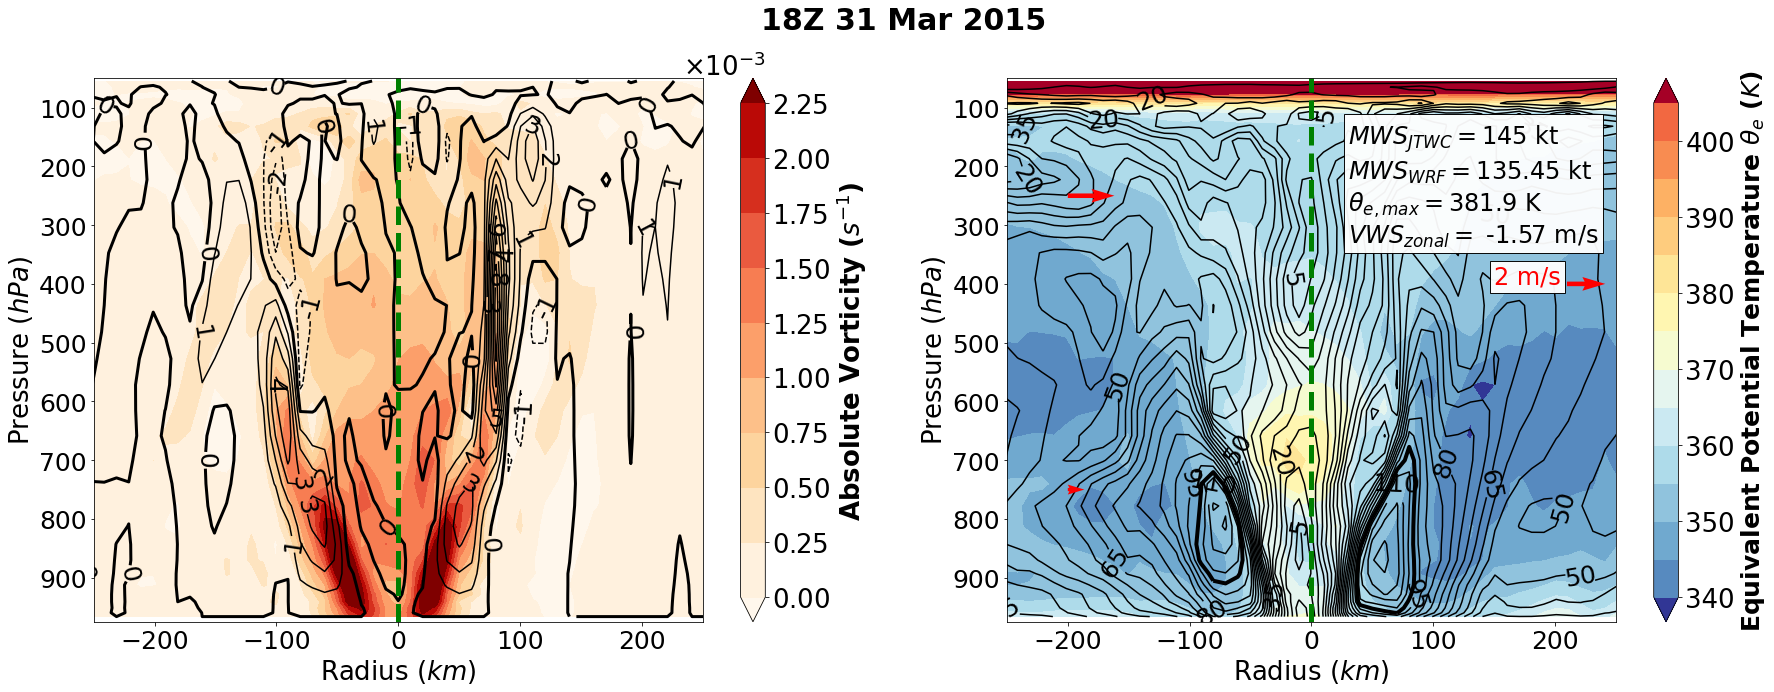

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize = (30,10))
plt.suptitle("18Z 31 Mar 2015", fontsize = 30,  fontweight = "bold")
#axes = (ax1, ax2, ax3, ax4)
cmap=cm.get_cmap('OrRd')

level1 = np.arange(0, 0.0025, 0.00025)
levels = np.arange(-6,10, 1)

#axes[1,0].set_title("RW - 24 hr (06Z 02 Apr 2015)", fontsize = 30,  fontweight = "bold")
c3 = axes[0].contour(dist7, press7, w7, levels, colors = "k")
cf3 = axes[0].contourf(dist7, press7, avortt7, level1, cmap = cmap, vmin = 0, vmax = 0.0025, extend = "both")

fmt = ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))
cbar0 = fig.colorbar(cf3, ax = axes[0], format = fmt)
cbar0.set_label("Absolute Vorticity ($s^{-1}$)", fontsize = 26, fontweight = "bold")
cbar0.ax.tick_params(labelsize = 26)
cbar0.ax.yaxis.offsetText.set(size = 26)
plt.clabel(c3, levels[1::1], inline=1, inline_spacing = 1,  fmt='%1.0f', fontsize=25, rightside_up = True)
c3.collections[6].set_linewidth(3)
plt.setp(axes[0].get_xticklabels(), Fontsize = 25)
plt.setp(axes[0].get_yticklabels(), Fontsize = 25)
axes[0].set_xlabel("Radius ($km$)", fontsize =26)
axes[0].set_ylabel("Pressure ($hPa$)", fontsize =26)
axes[0].set_yticks(np.arange(0,1000,100))
axes[0].set_ylim([50,975])
axes[0].set_xlim([-250, 250])
axes[0].invert_yaxis()
axes[0].axvline(x=0, color = "g", linestyle = "--",  linewidth = 5)
tex3 = r"JTWC: 115 kt" "\n" r"WRF: 131.67 kt "
#t3 = axes[0].text(70, 200, tex3, fontsize = 26, fontweight = "bold", zorder = 199)
#t3.set_bbox(dict(facecolor = "w", alpha = 0.95, edgecolor = "k"))

cmap=cm.get_cmap('RdYlBu_r')
levels = np.arange(340, 410, 5)
levels1 = np.arange(0,150, 5)
#axes[1].set_title("18Z 31 Mar 2015", fontsize = 30,  fontweight = "bold")
c1 = plt.contour(dist7, press7, wind7,levels1, colors = "k")
cf1 = plt.contourf(dist7, press7, te7, levels, cmap = cmap, vmin = 330, vmax = 420, extend = "both")
cbar1 = fig.colorbar(cf1, ax = axes[1])
cbar1.set_label("Equivalent Potential Temperature " r"$\theta_{e}$ ($K$)", fontsize = 25, fontweight = "bold")
cbar1.ax.tick_params(labelsize = 26)
cl1 = plt.clabel(c1, levels1[1::3], inline=1, inline_spacing = -1,  fmt='%1.0f', fontsize=25, rightside_up = True)
c1.collections[20].set_linewidth(4)
plt.setp(axes[1].get_xticklabels(), Fontsize = 25)
plt.setp(axes[1].get_yticklabels(), Fontsize = 25)
axes[1].set_xlabel("Radius ($km$)", fontsize =26)
axes[1].set_ylabel("Pressure ($hPa$)", fontsize =26)
axes[1].set_yticks(np.arange(0,1000,100))
axes[1].set_ylim([50,975])
axes[1].set_xlim([-250, 250])
axes[1].invert_yaxis()
axes[1].axvline(x=0, color = "g", linestyle = "--",  linewidth = 5)

z1_xpos=[-200, -200, 210]
z1_ypos=[250, 750, 400]
z1_xd = [ 2.4346452,   0.8648314, 2]
z1_yd = [0,0,0]
axes[1].quiver(z1_xpos, z1_ypos, z1_xd, z1_yd,color ="red", zorder=200) 

text1 = r"2 m/s"
tx1= axes[1].text(150, 400, text1, fontsize = 24, zorder = 199, color = "r")
tx1.set_bbox(dict(facecolor = "w", alpha = 0.95, edgecolor = "k"))

tex1 = r"$MWS_{JTWC} = 145$ kt" "\n" r"$MWS_{WRF} = 135.45$ kt " "\n" r"$\theta_{e,max} = 381.9$ K " "\n" r"$VWS_{zonal} =$ -1.57 m/s"
t1 = axes[1].text(30, 330, tex1, fontsize = 24, zorder = 199)
t1.set_bbox(dict(facecolor = "w", alpha = 0.95, edgecolor = "k"))

#cbar_ax = fig.add_axes([0.93, 0.07, 0.02, 0.85])
#cbar = fig.colorbar(cf, cax = cbar_ax, pad = 0.001)
#cbar.set_label("Equivalent Potential Temperature ($K$)", fontsize = 28, fontweight = "bold")
#cbar.ax.tick_params(labelsize = 26)
#cbar.ax.yaxis.offsetText.set(size = 26)